# BBC News Articles

## Task 1: Exploratory Data Analytics
###### (a) Load the dataset and construct a feature vector for each article in the. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.
###### (b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii) class distribution.

Setup

In [173]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import random
import matplotlib.pyplot as plt

Import Data

In [95]:
df = pd.read_csv("train.csv", skiprows=0, header=0, na_values= "", dtype=str)
df.head()

,ArticleId,Text,Category
0,1976,lifestyle governs mobile choice faster better ...,tech
1,1797,french honour director parker british film dir...,entertainment
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment
4,342,u2 desire number one u2 three prestigious gram...,entertainment


Vectorize Data

In [151]:
articles_text = df["Text"].to_numpy()

#select 5 random articles for task 1
random_sample = random.sample(list(articles_text), 5)

## APPROACH ONE ##
vectorizer1 = CountVectorizer()
vectorizer1.fit(articles_text)

vectorizer1_sample = CountVectorizer()
vectorizer1_sample.fit(random_sample)

# encode document
vector1 = vectorizer1.transform(articles_text)
vector1 = vector1.toarray()
v1_names = vectorizer1.get_feature_names_out()

vector1_sample = vectorizer1_sample.transform(random_sample)
vector1_sample = vector1_sample.toarray()
v1_sample_names = vectorizer1_sample.get_feature_names_out()

#map sample to feature names
v1_sample_df = pd.DataFrame(data=zip(v1_sample_names, vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4], sum([vector1_sample[0], vector1_sample[1], vector1_sample[2], vector1_sample[3], vector1_sample[4]])), columns=['Features', 'Article 1', 'Article 2', 'Article 3', 'Article 4', 'Article 5', 'Total'])

v1_df = pd.DataFrame(data=vector1, columns = v1_names)

v1_df_emily = pd.DataFrame(data=vector1, columns = v1_names)


# summarize encoded vector
print("Method 1")
print(f'article vector\n {vector1}')
print('\nArticles:', vector1.shape[0], ', Extracted Features:', vector1.shape[1])
print(f'\narticle vector (5 articles)\n {vector1_sample}')

v1_sample_df.head(vector1_sample.shape[1])


## APPROACH TWO ## MAYBE DELETE IF NOT USED????
#vectorizer2 = TfidfVectorizer()
#vectorizer2.fit(articles_text)

#vectorizer2_sample = TfidfVectorizer()
#vectorizer2_sample.fit(random_sample)

#Summary
#print(f'vector vocabulary - {vectorizer.vocabulary_}\n')

# encode document
#vector2 = vectorizer2.transform(articles_text)
#vector2_sample = vectorizer2_sample.transform(random_sample)

# summarize encoded vector
#print('\n', "Method 2")
#print(f'article vector\n {vector2.toarray()}')
#print(f'\narticle vector (5 articles)\n {vector2_sample.toarray()}')
#print('\nArticles:', vector2.shape[0], ', Extracted Features:', vector2.shape[1])

Method 1
article vector
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Articles: 428 , Extracted Features: 13518

article vector (5 articles)
 [[1 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 2 ... 0 1 0]
 [0 0 0 ... 1 0 1]]


,Features,Article 1,Article 2,Article 3,Article 4,Article 5,Total
0,000,1,0,0,1,0,2
1,10,1,0,0,0,0,1
2,100,0,0,0,2,0,2
3,12,0,0,0,1,0,1
4,13,0,0,0,0,1,1
...,...,...,...,...,...,...,...
610,years,0,2,0,2,0,4
611,yet,0,1,0,0,0,1
612,yimou,0,0,0,0,1,1
613,york,0,0,0,1,0,1


Plot Data

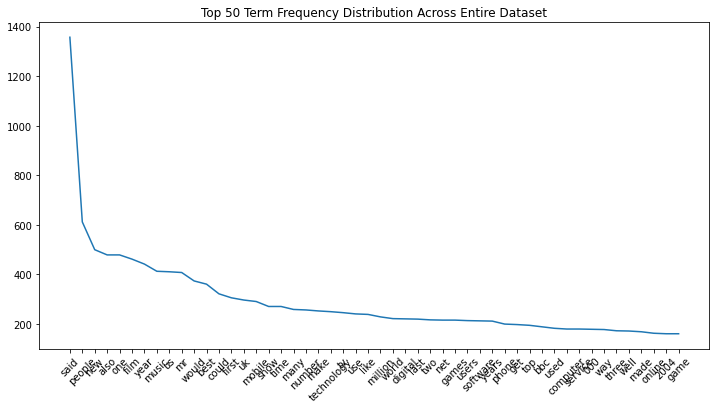

In [188]:
#find top 50 terms

totals = []
for column in v1_df:
    totals.append(v1_df[column].sum())

feature_totals = pd.DataFrame(data=zip(v1_names, totals), columns=['Terms', 'Total'])
top_50_features = feature_totals.sort_values(by='Total', ascending=False)
top_50_features = top_50_features.head(50)

#plot top 50 distribution
x = top_50_features['Terms']
y = top_50_features['Total']
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.title('Top 50 Term Frequency Distribution Across Entire Dataset')
plt.show()

## Task 2: Classification Models Learning

### Logistic Regression
###### Train your logistic regression classifier with L2-regularization. Consider different values of the regularization term λ. Describe the effect of the regularization parameter λ on the outcome in terms of bias and variance. Report the plot generated for specific λ values with training loss on the y-axis versus λ on the x-axis to support your claim.

### Naive Bayes
###### Train a Naive Bayes classifier using all articles features. Report the (i) top-20 most identifiable words that are most likely to occur in the articles over two classes using your NB classifier, and (ii) the top-20 words that maximize the following quantity 𝑃(𝑋𝑤=1|𝑌=𝑦)/𝑃(𝑋𝑤=1|𝑌≠𝑦). Which list of words describe the two classes better? Briefly explain your reasoning. - She's going to change some stuff and make an announcement


In [ ]:
# Emily

from sklearn.naive_bayes import MultinomialNB

# X_train is vectorised features, Y_train is the classes of each row / target variable

NB_clf = MultinomialNB()
NB_clf.fit(X_train, Y_train)

# Training accuracy
y_train_pred = clf.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_train_pred)
# or
train_acc_2 = clf.score(X_train, y_train)

# Testing accuracy
Y_pred = clf.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(Y_Test, Y_pred))

####EMILY HERE IS YOUR DATAFRAME#####
v1_df_emily

### Soft Value Margin (SVM)
###### Train your SVM classification models on the training dataset. You need to report two surface plots for: (i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶), and (ii) the hard-margin RBF kernel with your choice of kernel width (σ). Explain the impact of penalty 𝐶 on the soft-margin decision boundaries, as well as the kernel hyperparameter on the hard-margin decision boundaries.

In [ ]:
# Humza

### Nearest Neighbor
###### Consider the neural network with the following hyperparameters: the initial weights uniformly drawn in range [0,0.1] with learning rate 0.01.
######  ● Train a single hidden layer neural network using the hyperparameters on the training dataset, except for the number of hidden units (x) which should vary among 5, 20, and 40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n features x = [x1, ..., xn]T , the hidden layer has x nodes z = [z1, ..., zx]T , and the output layer is a probability distribution y = [y1, y2]T over two classes.
######  ● Plot the average training cross-entropy loss as shown below on the y-axis versus the number of hidden units on the x-axis. Explain the effect of numbers of hidden units. 𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝐿𝑜𝑠𝑠 =− 𝑖=1 2 Σ 𝑦𝑖 log(𝑦𝑖 ^ )